<a href="https://colab.research.google.com/github/dton24/Notes/blob/main/MLR_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 4321 - Regression Assignment
# Dr. Mohammad Salehan

In this assignment you Mutiple Regression Analysis on a flight dataset. There are 9 questions which you need to answer. The first 2 questions require writing code. The rest of the questions should be answered in English.

Enter your name below.

## Import required packages

In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


no display found. Using non-interactive Agg backend


## Load the dataset

In [ ]:
flight_df = pd.read_excel('Airfares.xlsx', sheet_name='data')
flight_df.shape

(638, 18)

In [ ]:
# Explore data
flight_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.991341,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.160907,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.283234,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


## Preprocessing
1.Conduct preprocessing below using FARE as dependent variable and the following variables as independent variables: COUPON,	NEW,	VACATION,	SW,	HI,	S_INCOME,	E_INCOME,	S_POP,	E_POP,	SLOT,	GATE,	DISTANCE,	PAX. At the end of preprocessing, all independent variables should be in a dataframe named X and the dependent variable should be in a Series object(i.e., single-dimension dataframe) named y.

In [ ]:
y = flight_df['FARE']
X = flight_df[['COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX']]

In [ ]:
X.head()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX
0,1.00,3,No,Yes,5291.991341,28637,21112,3036732,205711,Free,Free,312,7864
1,1.06,3,No,No,5419.160907,26993,29838,3532657,7145897,Free,Free,576,8820
2,1.06,3,No,No,9185.283234,30124,29838,5787293,7145897,Free,Free,364,6452
3,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Controlled,Free,612,25144
4,1.06,3,No,Yes,2657.351987,29260,29838,7830332,7145897,Free,Free,612,25144


In [ ]:
# NEW column appears to be categorical
flight_df['NEW'].unique()

array([3, 2, 1, 0])

In [ ]:
# Create Dummies for categorical columns SLOT, GATE, VACATION, SW, NEW
X = pd.get_dummies(X, columns = ['SLOT', 'GATE', 'VACATION', 'SW', 'NEW'])

In [ ]:
X.head()

,COUPON,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free,VACATION_No,VACATION_Yes,SW_No,SW_Yes,NEW_0,NEW_1,NEW_2,NEW_3
0,1.00,5291.991341,28637,21112,3036732,205711,312,7864,0,1,0,1,1,0,0,1,0,0,0,1
1,1.06,5419.160907,26993,29838,3532657,7145897,576,8820,0,1,0,1,1,0,1,0,0,0,0,1
2,1.06,9185.283234,30124,29838,5787293,7145897,364,6452,0,1,0,1,1,0,1,0,0,0,0,1
3,1.06,2657.351987,29260,29838,7830332,7145897,612,25144,1,0,0,1,1,0,0,1,0,0,0,1
4,1.06,2657.351987,29260,29838,7830332,7145897,612,25144,0,1,0,1,1,0,0,1,0,0,0,1


In [ ]:
# Avoid overfitting and minimize risk of multicollinearity by getting rid of one dummy column for each original categorical column
X = X.drop(columns = ['SLOT_Controlled', 'GATE_Constrained', 'VACATION_No', 'SW_No', 'NEW_0'])

In [ ]:
# Check to make sure selected columns were dropped
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COUPON        638 non-null    float64
 1   HI            638 non-null    float64
 2   S_INCOME      638 non-null    int64  
 3   E_INCOME      638 non-null    int64  
 4   S_POP         638 non-null    int64  
 5   E_POP         638 non-null    int64  
 6   DISTANCE      638 non-null    int64  
 7   PAX           638 non-null    int64  
 8   SLOT_Free     638 non-null    uint8  
 9   GATE_Free     638 non-null    uint8  
 10  VACATION_Yes  638 non-null    uint8  
 11  SW_Yes        638 non-null    uint8  
 12  NEW_1         638 non-null    uint8  
 13  NEW_2         638 non-null    uint8  
 14  NEW_3         638 non-null    uint8  
dtypes: float64(2), int64(6), uint8(7)
memory usage: 44.4 KB


2. Check the missing values. Drop them if needed.

In [ ]:
y.isnull().sum()

0

In [ ]:
X.isnull().sum()

COUPON          0
HI              0
S_INCOME        0
E_INCOME        0
S_POP           0
E_POP           0
DISTANCE        0
PAX             0
SLOT_Free       0
GATE_Free       0
VACATION_Yes    0
SW_Yes          0
NEW_1           0
NEW_2           0
NEW_3           0
dtype: int64

## Partition data

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
# Taking a look at valid_y values
valid_y.head()

101    240.88
619    347.82
616    279.83
446    128.36
522    289.25
Name: FARE, dtype: float64

In [ ]:
# Taking a look at valid_X values
valid_X.head()

,COUPON,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,SLOT_Free,GATE_Free,VACATION_Yes,SW_Yes,NEW_1,NEW_2,NEW_3
101,1.13,4146.133542,29260,30268,7830332,1106780,779,6614,0,1,0,0,0,0,1
619,1.37,6865.767169,38813,31981,1653017,4549784,2428,17938,1,1,0,0,0,0,1
616,1.58,2295.226844,23025,31981,2753373,4549784,1970,5190,0,1,0,0,0,0,1
446,1.28,3262.148046,29260,21276,7830332,1481709,1038,6233,0,1,0,1,0,0,1
522,1.52,2019.980267,32991,30916,8621121,2230831,2411,10125,0,1,0,0,0,0,1


## Train the model

In [ ]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

## Print coefficients

In [ ]:
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  54.80361619672112
       Predictor  coefficient
0         COUPON   -12.497122
1             HI     0.006792
2       S_INCOME     0.000670
3       E_INCOME     0.001244
4          S_POP     0.000004
5          E_POP     0.000004
6       DISTANCE     0.077999
7            PAX    -0.000917
8      SLOT_Free   -13.758926
9      GATE_Free   -21.456951
10  VACATION_Yes   -35.238753
11        SW_Yes   -42.150477
12         NEW_1    -8.648719
13         NEW_2     4.085492
14         NEW_3    -9.077511

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7233
            Mean Absolute Error (MAE) : 27.0587
          Mean Percentage Error (MPE) : -4.4361
Mean Absolute Percentage Error (MAPE) : 20.0523


3. Interpret the coefficients for DISTANCE, SW, and VACATION. You need to write one sentence for each coefficient, no code.

## Test the model using the training set

In [ ]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.7726178738542124
AIC :  3828.2908204335517
BIC :  3895.3629707798636


## Test the model using validation set

In [ ]:
# Use predict() to make predictions on a new set. car_lm_pred are the predicted outcomes (after training the model "car_lm") for the validation data set for X.
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
#Print the first 20 predictions
print(result.head(20))

      Predicted  Actual   Residual
101  185.714268  240.88  55.165732
619  305.424052  347.82  42.395948
616  255.187013  279.83  24.642987
446  146.719740  128.36 -18.359740
522  301.863168  289.25 -12.613168
525  230.557502  238.73   8.172498
305  114.973694  140.90  25.926306
41   203.645324  250.73  47.084676
47   184.734484  230.87  46.135516
605  161.030211  164.30   3.269789
455   73.704230  118.17  44.465770
523  309.989985  289.25 -20.739985
339  108.475600  105.41  -3.065600
69   145.883526  113.99 -31.893526
473  275.722067  248.49 -27.232067
460  192.751037  252.97  60.218963
635  165.134677  124.87 -40.264677
23   107.119197  106.77  -0.349197
554   48.030569  106.65  58.619431
13   144.725934  132.05 -12.675934


## Print performance measures
Compute common accuracy measures

In [ ]:
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : -1.7914
       Root Mean Squared Error (RMSE) : 35.9631
            Mean Absolute Error (MAE) : 28.4561
          Mean Percentage Error (MPE) : -6.5771
Mean Absolute Percentage Error (MAPE) : 21.5667


4. Compare the performance between training and validation sets. Write below if you think overfitting is a concern and why.

## Determine the residuals and create a histogram

1.0


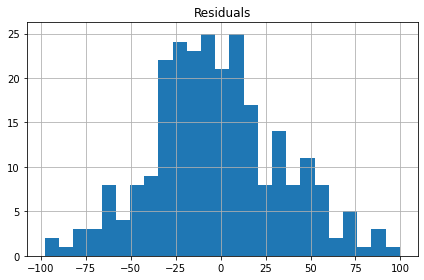

In [ ]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

5. What does the above chart show about the residuals? Are there any problems?

## Exhaustive search
Run an exhaustive search.

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)

    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

        n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI  NEW_1  \
0       1  0.250372  4270.335114    True     False     False  False      False  False  False   
1       1 -0.001923  4381.153100   False     False     False  False      False   True  False   
2       1  0.029816  4368.856460   False     False     False  False      False  False  False   
3       1  0.096402  4341.695958   False     False      True  False      False  False  False   
4       1  0.017039  4373.854535   False     False     False  False      False  False  False   
...    ..       ...          ...     ...       ...       ...    ...        ...    ...    ...   
32762  14  0.768789  3833.712233    True      True     False   True       True   True   True   
32763  14  0.772589  3827.381452    True      True      True   True       True   True   True   
32764  14  0.756348  3853.732821    True      True      True   True       True  False   True   
32765  14  0.772842  3826.955892   False

In [ ]:
from itertools import chain, combinations

def exhaustive_search(all_variables, train_function, score_function):
    subsets = list(chain(*[combinations(all_variables, i+1) for i, _ in enumerate(all_variables)]))
    results = []
    for subset in subsets:
        subset = list(subset)
        model = train_function(subset)
        score = score_function(model, subset)
        results.append({'model': model, 'variables': subset, 'n': len(subset), 'score': score})
    return results


6. Based on the exhaustive search, which model is the best?  Why?

## Backward elimination

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

NameError: name 'backward_elimination' is not defined

In [ ]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -1.8591
       Root Mean Squared Error (RMSE) : 36.1129
            Mean Absolute Error (MAE) : 28.5252
          Mean Percentage Error (MPE) : -6.7084
Mean Absolute Percentage Error (MAPE) : 21.7198


7. Write the components of the final model from backward elimination below. Compare the best model with the one generated by exhaustive search. Is there any difference? Why?

## Forward selection

In [ ]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, SLOT_Free, GATE_Free, VACATION_Yes, SW_Yes, NEW_1, NEW_2, NEW_3
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_Yes
Step: score=3913.59, add VACATION_Yes
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Free
Step: score=3852.81, add SLOT_Free
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, add None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


8. Write the components of the final model from forward selection below. Compare the best model with those generated by backward elimination and exhaustive search. Is there any difference? Why?

In [ ]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, SLOT_Free, GATE_Free, VACATION_Yes, SW_Yes, NEW_1, NEW_2, NEW_3
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_Yes
Step: score=3913.59, add VACATION_Yes
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Free
Step: score=3852.81, add SLOT_Free
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'GATE_Free', 'SLOT_Free', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']


9. Write the components of the final model from stepwise selection below. Compare the best model with those generated by forward selection, backward elimination, and exhaustive search. Is there any difference? Why?